# 1.가설: 음주 여부에 따라 건강검진 수치 차이가 있을까?
# 2.가설: 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

# 3. 라이브러리 로드

# 4. 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
if os.name == "posix":
    plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("data/NHIS_OPEN_GJ_2017_v1.1.csv", encoding="cp949")

In [4]:
df.shape

(1000000, 34)

# 5. 데이터 미리보기

In [5]:
df.head(3)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [6]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
272158,2017,272159,2,11,11,145,50,76.0,1.2,0.8,...,51.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


# 6. 기본정보 보기

In [7]:
df.info() #다양한 정보 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [8]:
#column만 따로 출력
df.columns


Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [9]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

# 7. 결측치 보기

In [10]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [11]:
#결측치 확인
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

<AxesSubplot:>

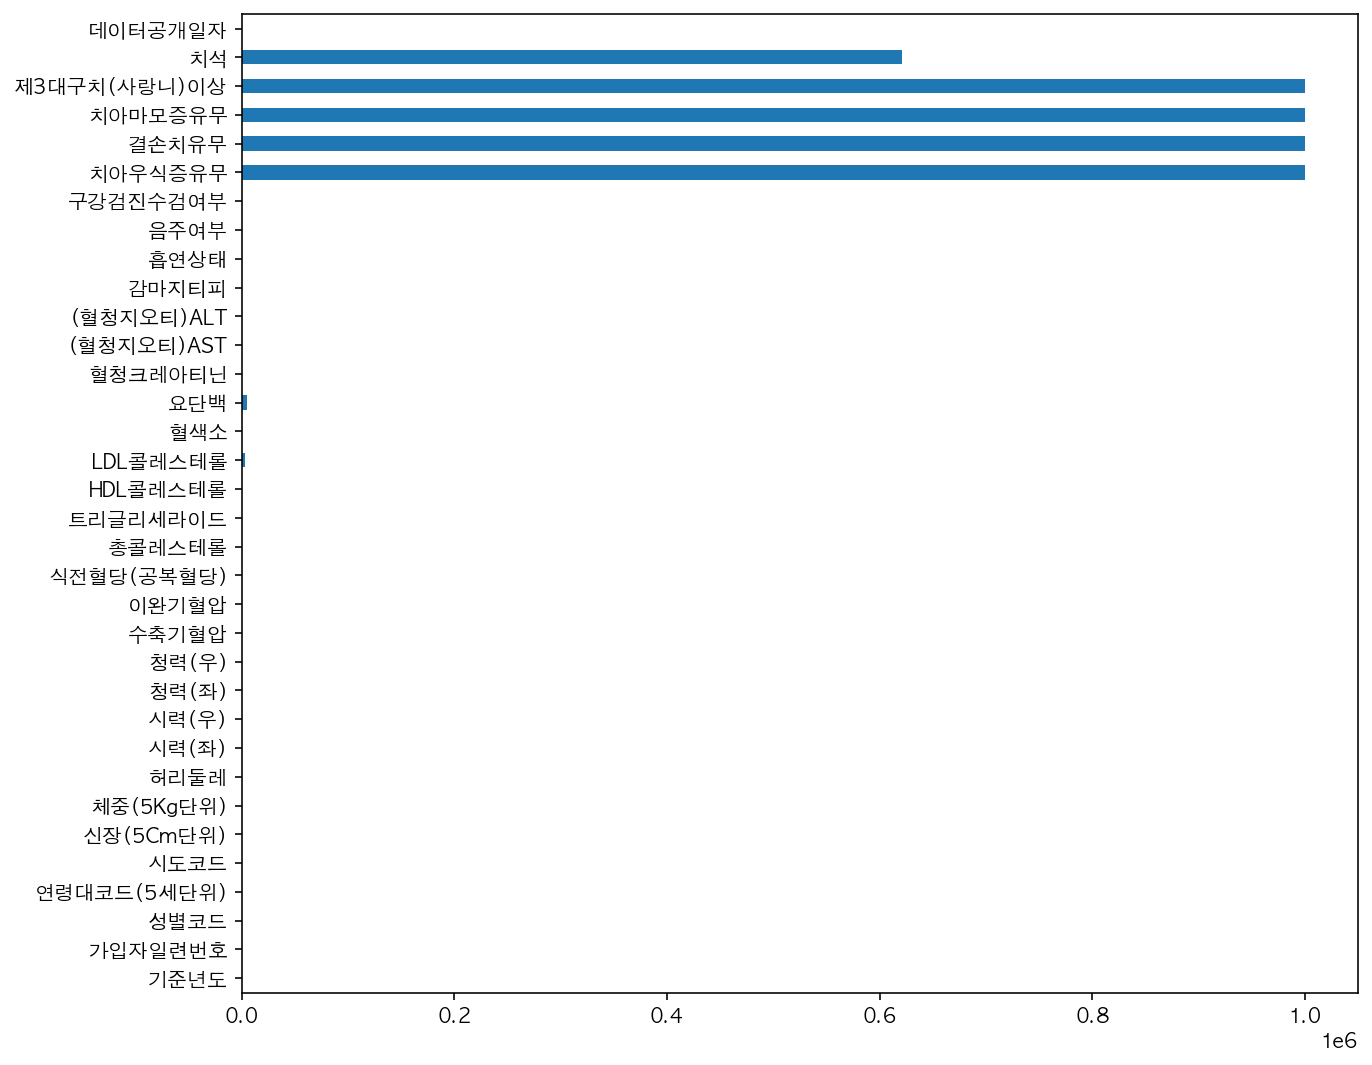

In [12]:
df.isnull().sum().plot.barh(figsize=(10,9))

# 8. 일부 데이터 요약하기

In [13]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0


In [14]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info() #요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [15]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


# 9. value_counts로 값 집계하기

In [16]:
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [17]:
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# 10. groupby와 pivot_table사용하기

## 10.1 groupby

In [19]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [20]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [21]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [22]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [23]:
#agg을 사용하면 여러 수치를 함께 구할 수 있음
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(
    ["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

## 10.2 pivot_table

In [25]:
#pivot은 형태만 바꾸고자 할 때, pivot_table은 연산을 하고자 할 때
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
N,500439
Y,499025


In [26]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
N,26.819650,19.0
Y,47.588675,30.0


In [24]:
pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    N     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     Y     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    N     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     Y     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 11. 전체 데이터 시각화 하기
* 100만개가 넘는 데이터를 시각화할때 되도록 groupby or pivot_table사용
* seaborn 사용시 느릴 수 있음(100만개 데이터)

## 11.1 히스토그램

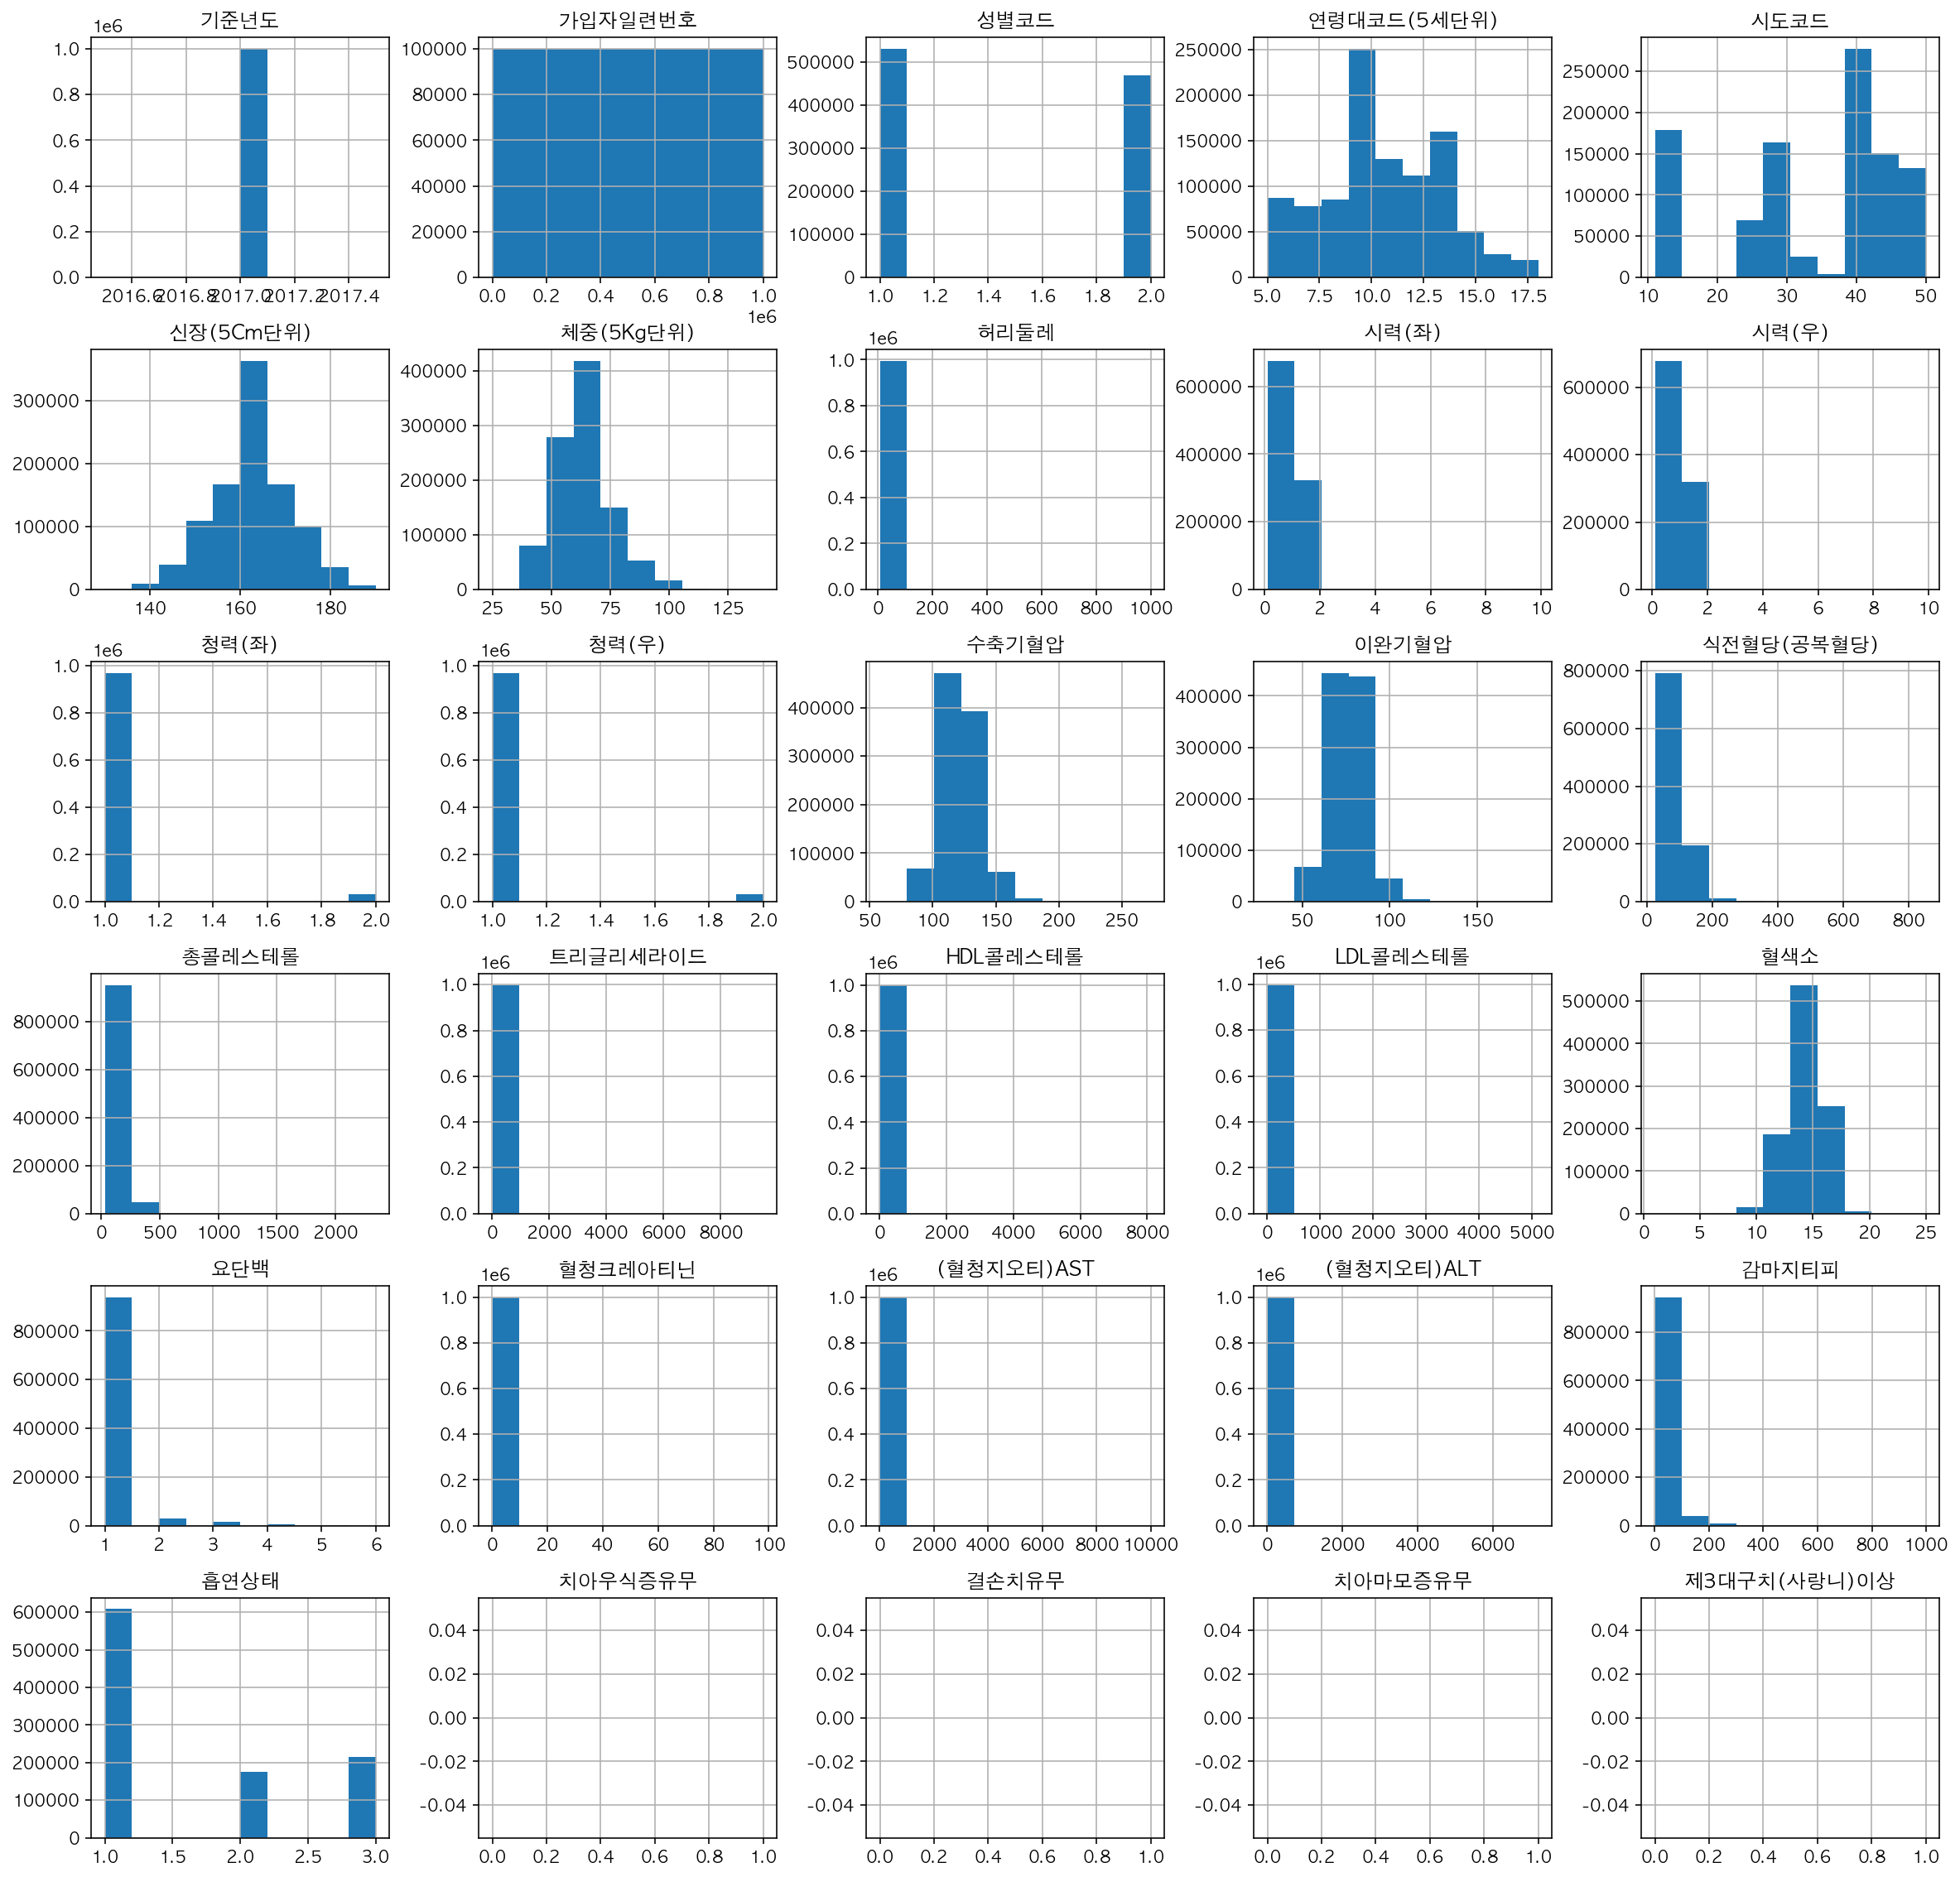

In [27]:
h = df.hist(figsize=(20,20))

## 11.2 슬라이싱 사용하기

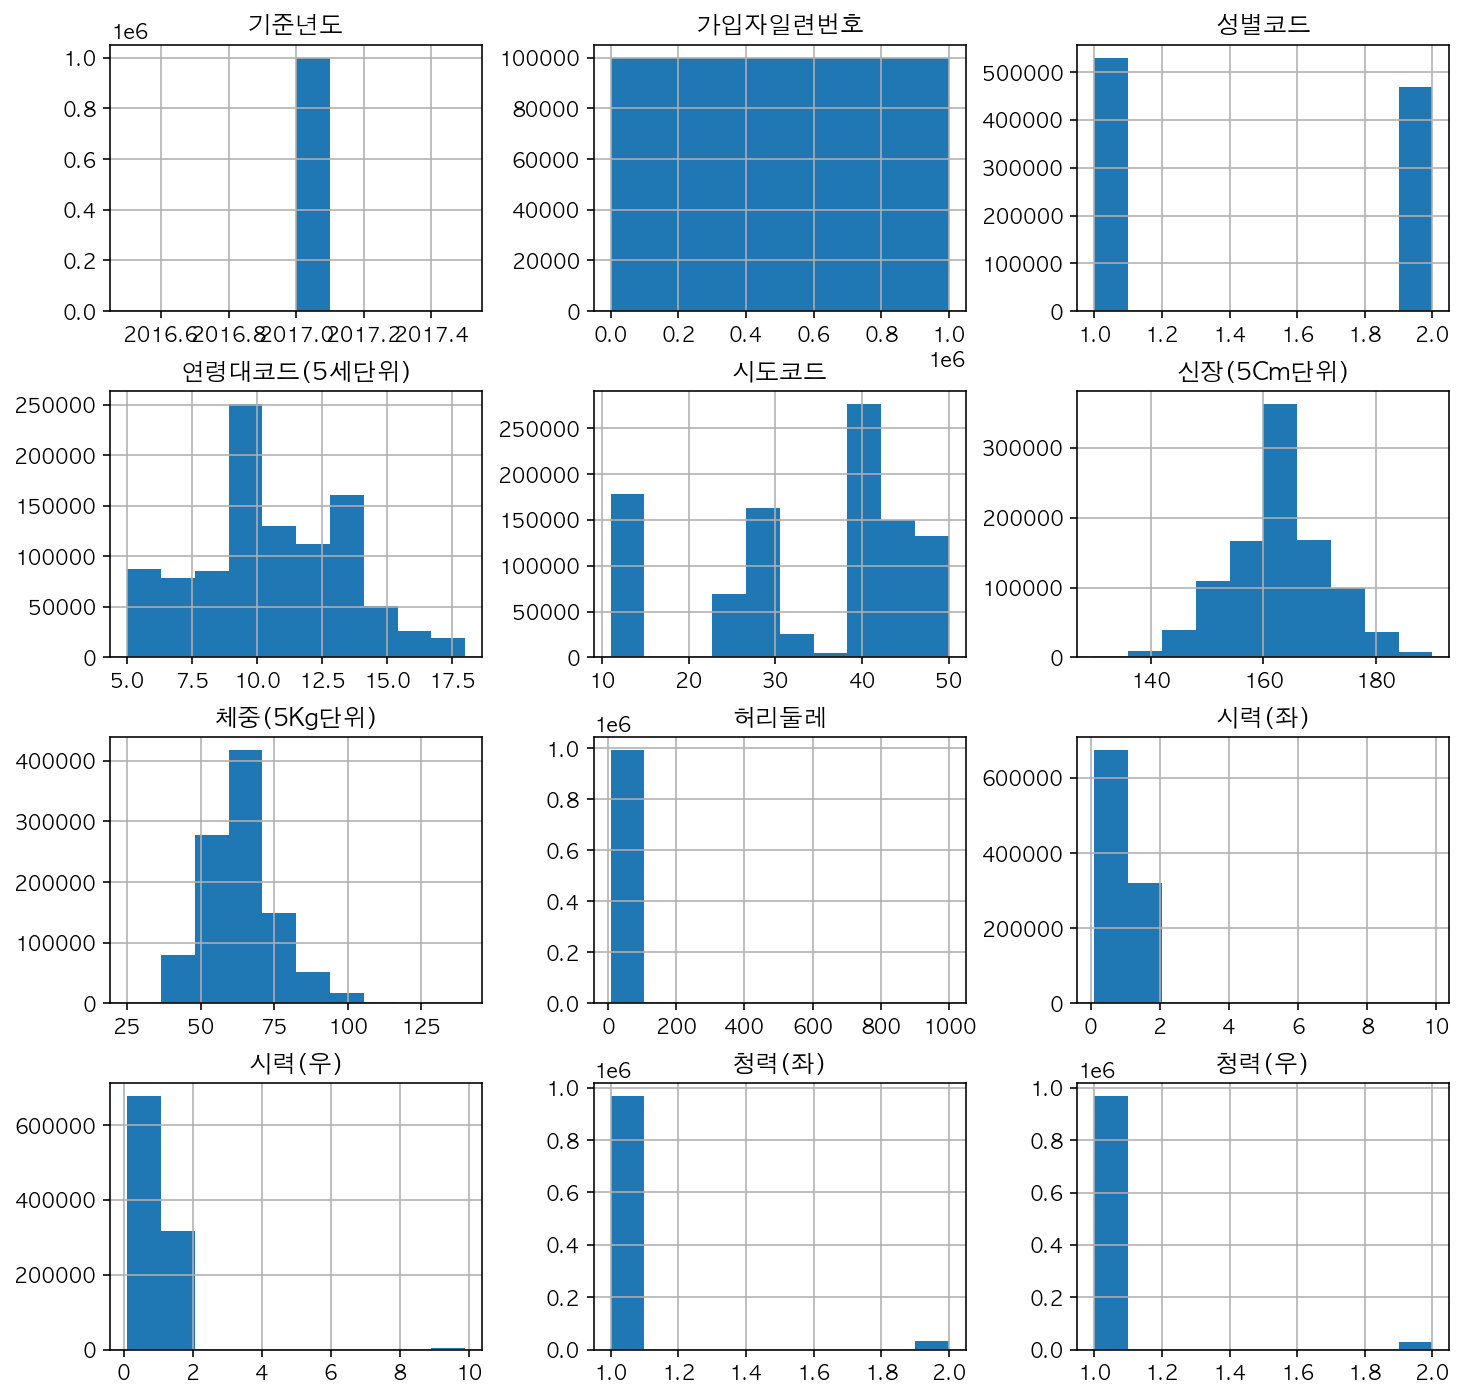

In [28]:
#[행, 열]
h = df.iloc[:,:12].hist(figsize=(12,12))

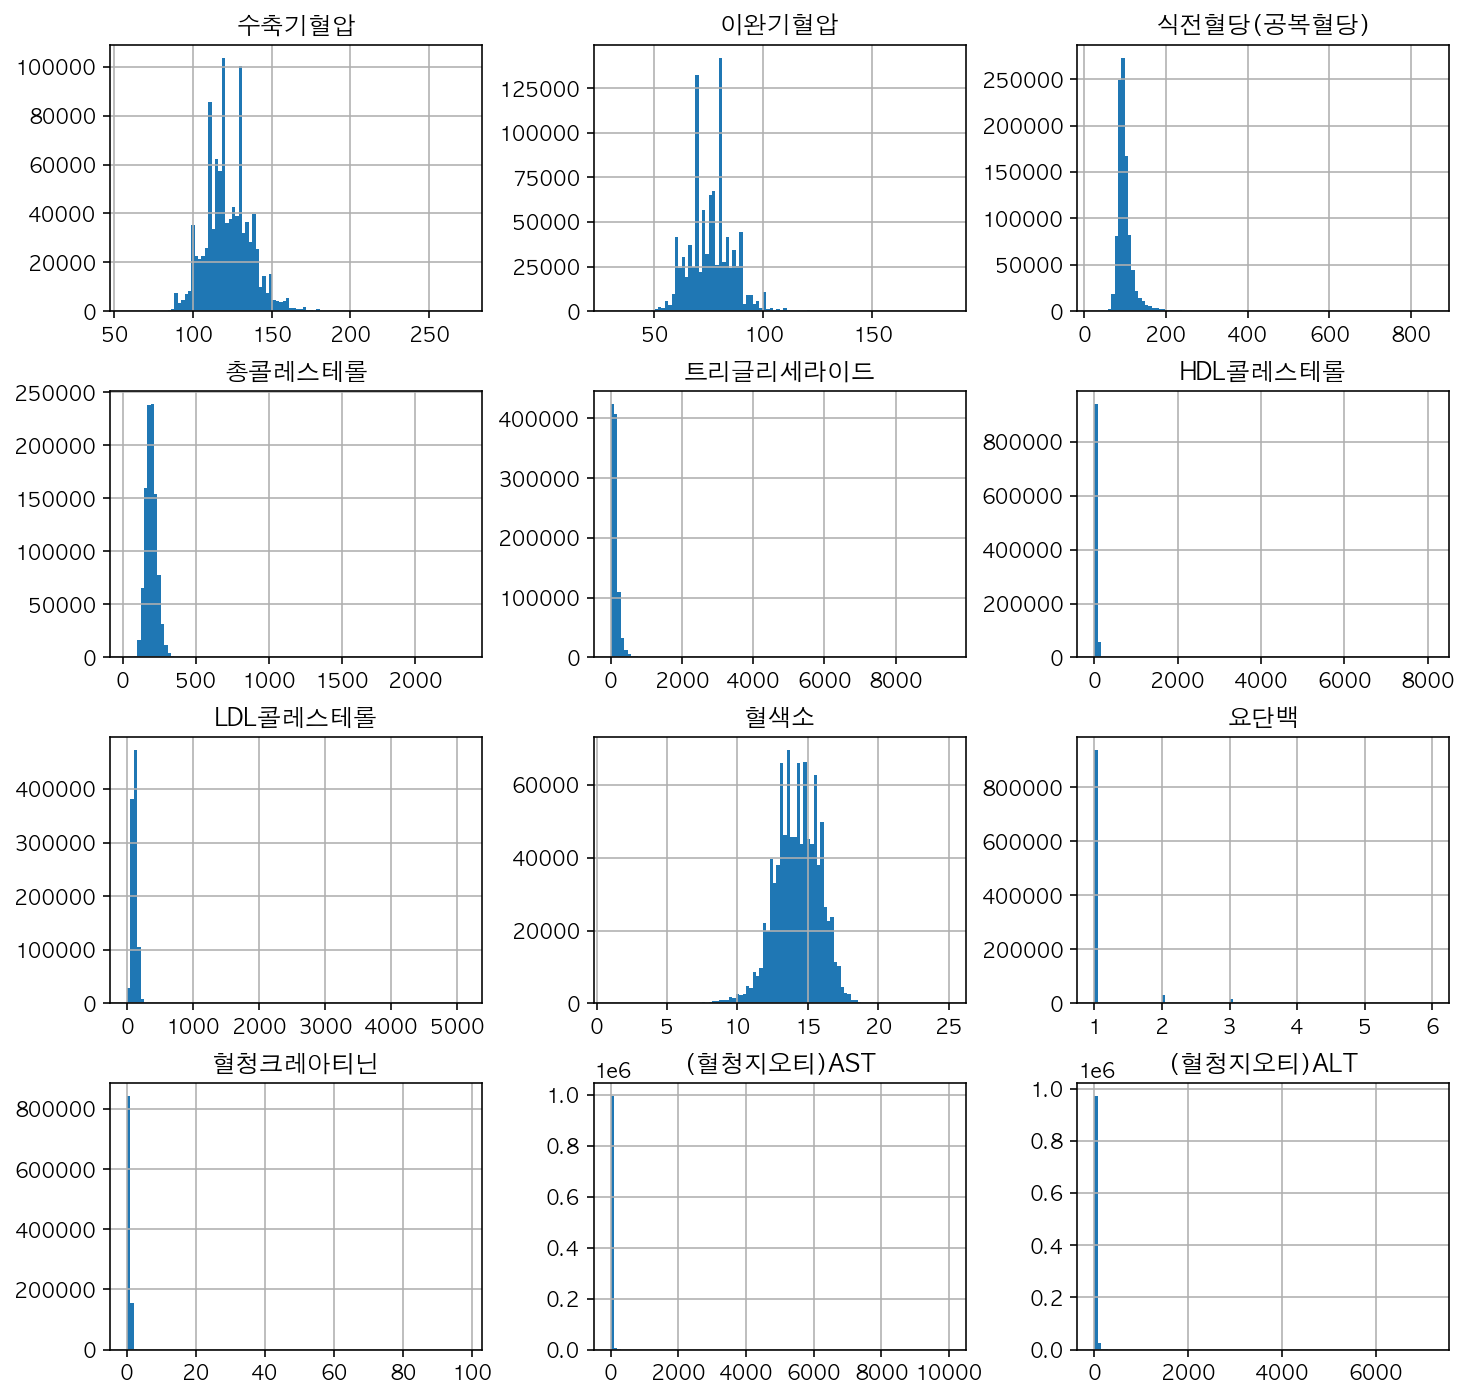

In [29]:
h = df.iloc[:, 12:24].hist(figsize=(12,12), bins=100) #bins:막대 갯수

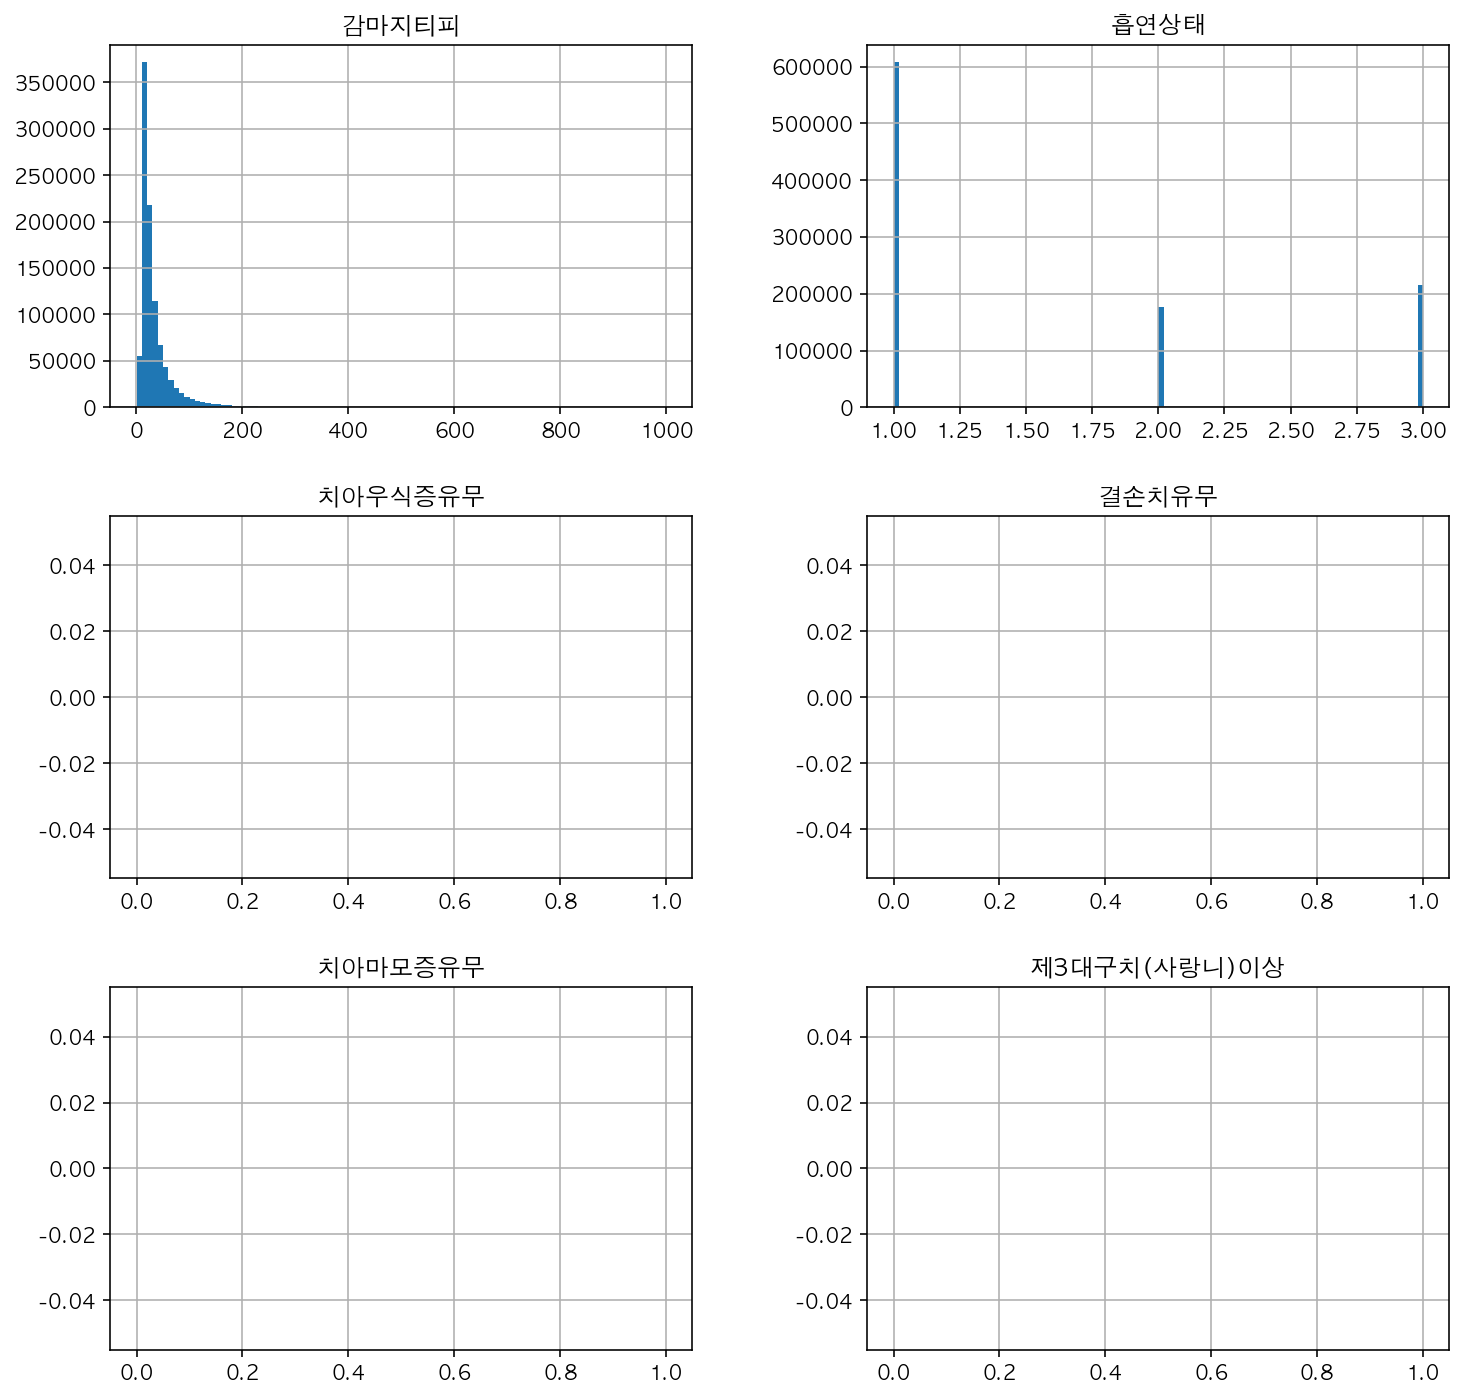

In [30]:
h = df.iloc[:, 24:].hist(figsize=(12,12), bins=100)

# 12. 샘플데이터 추출하기
* 전체 데이터 사용 시 너무 느림. 일부만 샘플링해서 사용ㅋ

In [31]:
df_sample = df.sample(1000, random_state=1) #항상 같은 값 반환하기 위한 random_state
df_sample.shape

(1000, 34)

# 13. 데이터 시각화 도구 Seaborn 사용

# 14. 범주형(카테고리) 데이터 시각화

## 14.1 countplot - 음주여부

<AxesSubplot:>

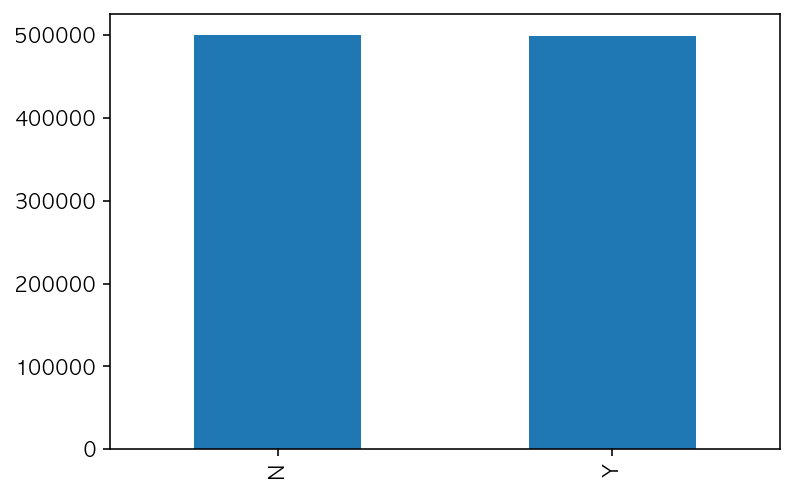

In [32]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

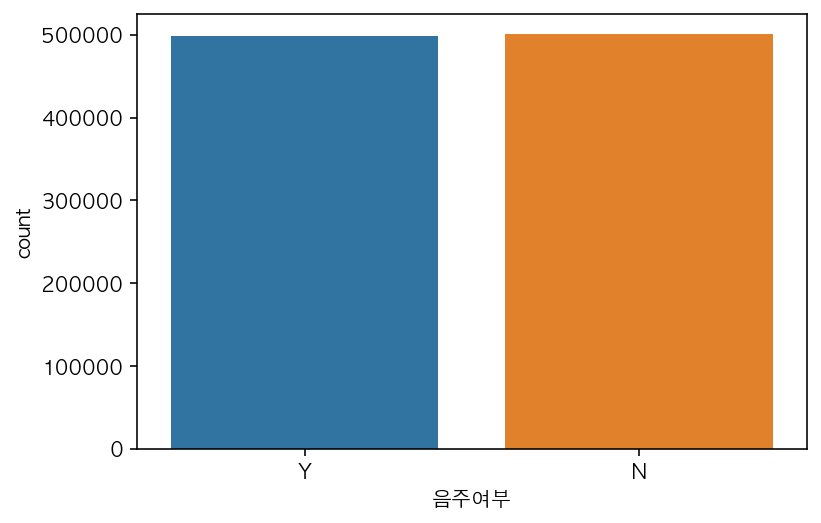

In [33]:
sns.countplot(x="음주여부", data=df)

## 14.2 hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

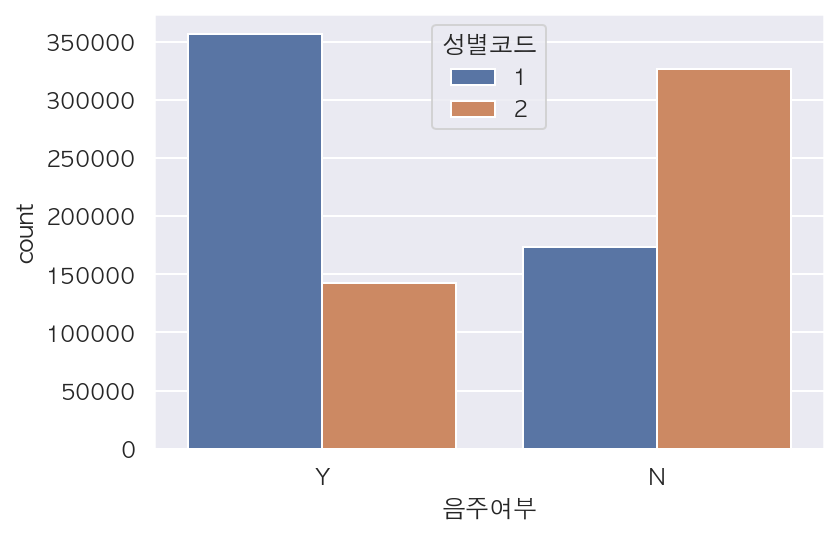

In [34]:
sns.set(font_scale=1.0, font="AppleGothic")
sns.countplot(data=df, x="음주여부", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

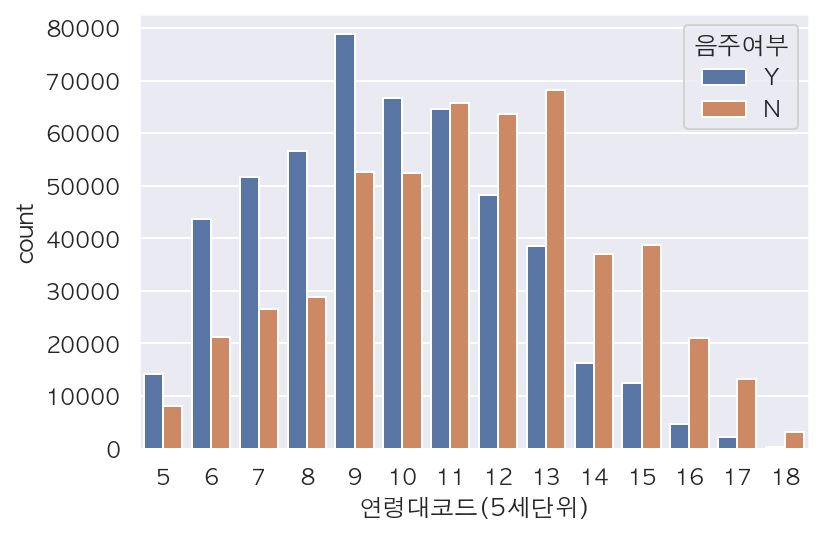

In [36]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

## 14.3 countplot - 키와 몸무게

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

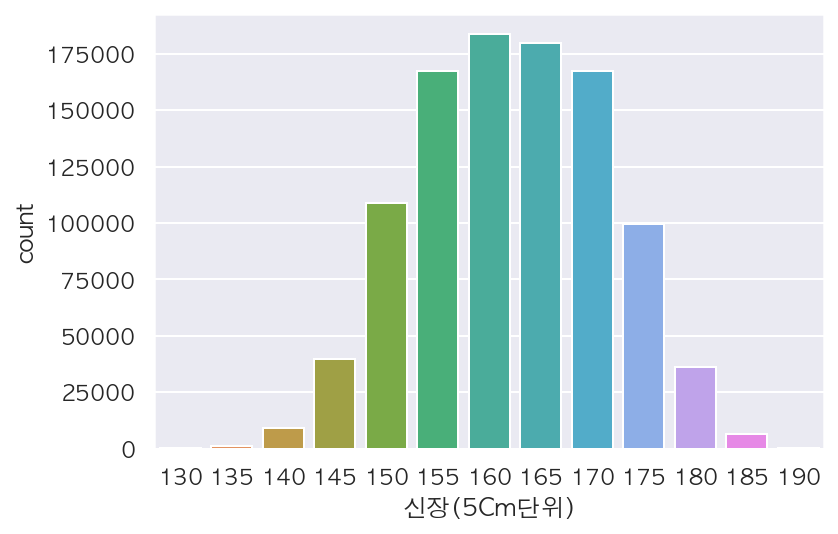

In [40]:
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

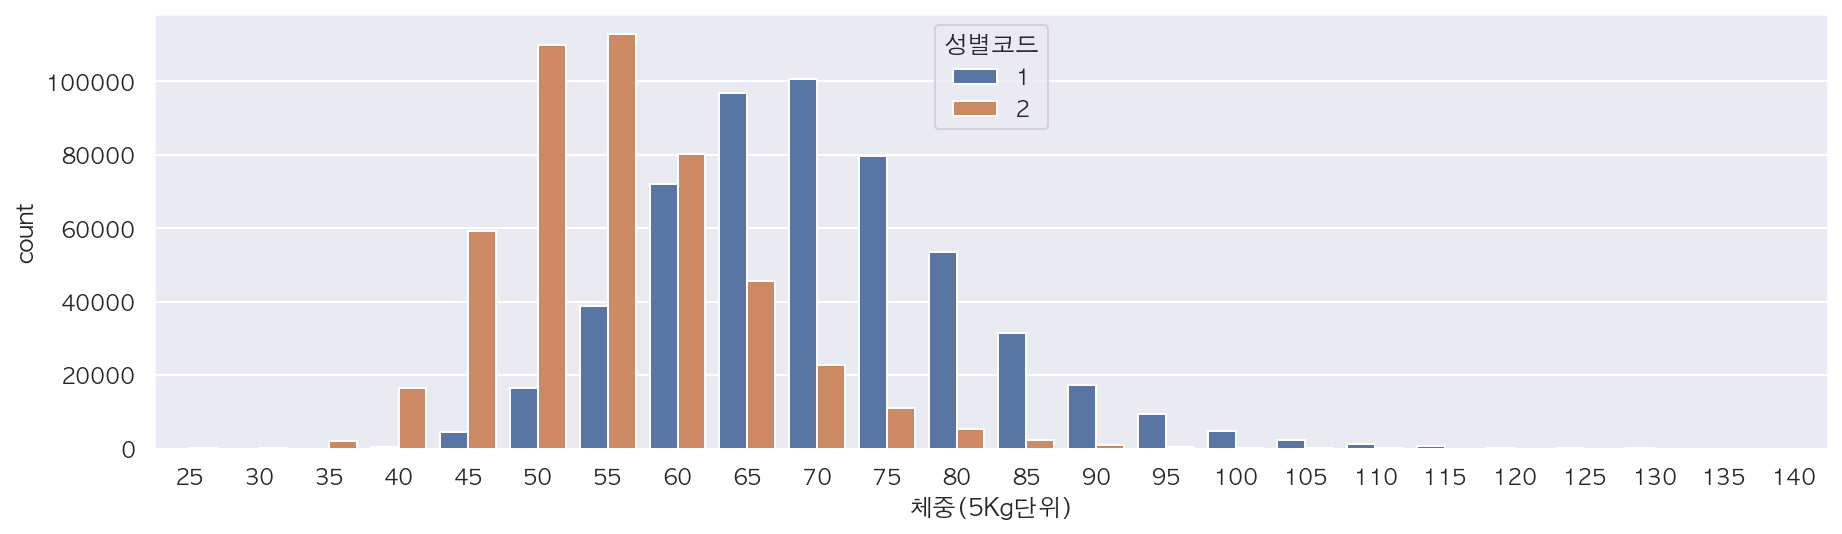

In [42]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

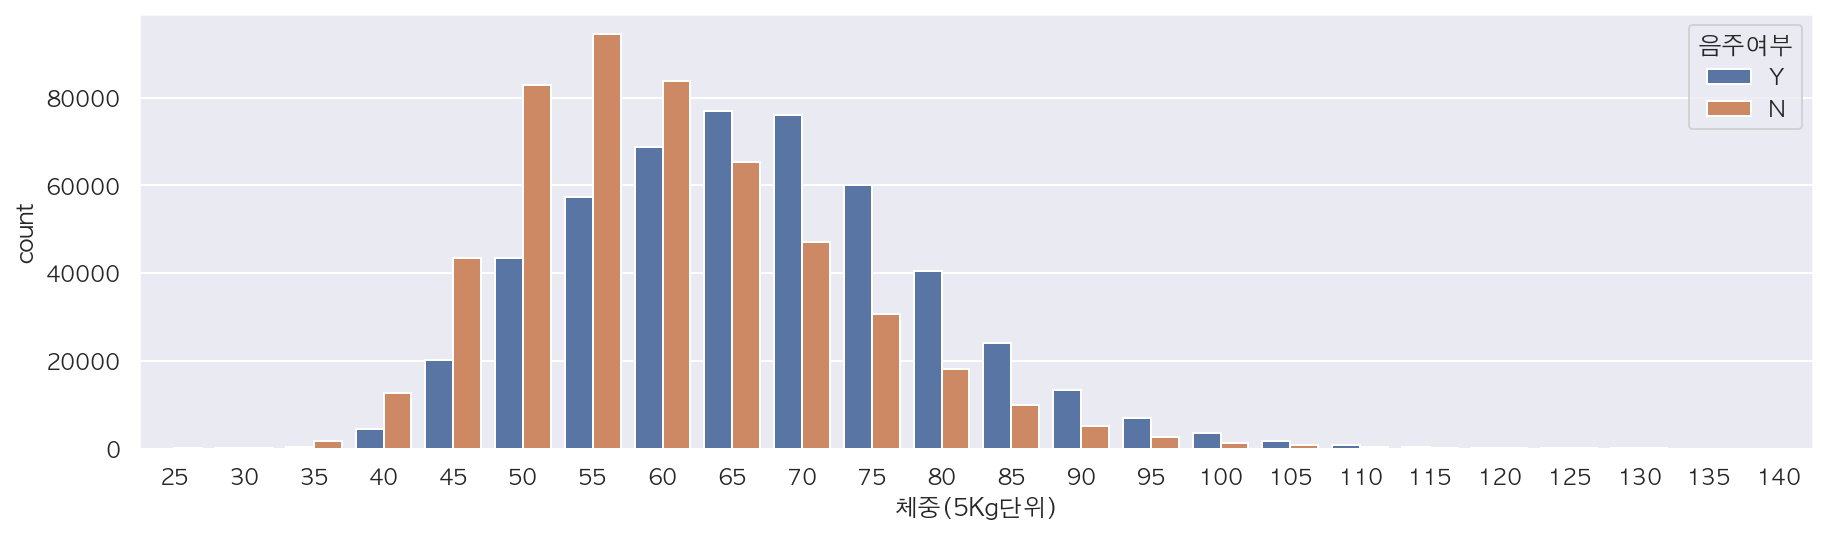

In [43]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="음주여부")

## 14.4 barplot - 수치형 vs 범주형

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

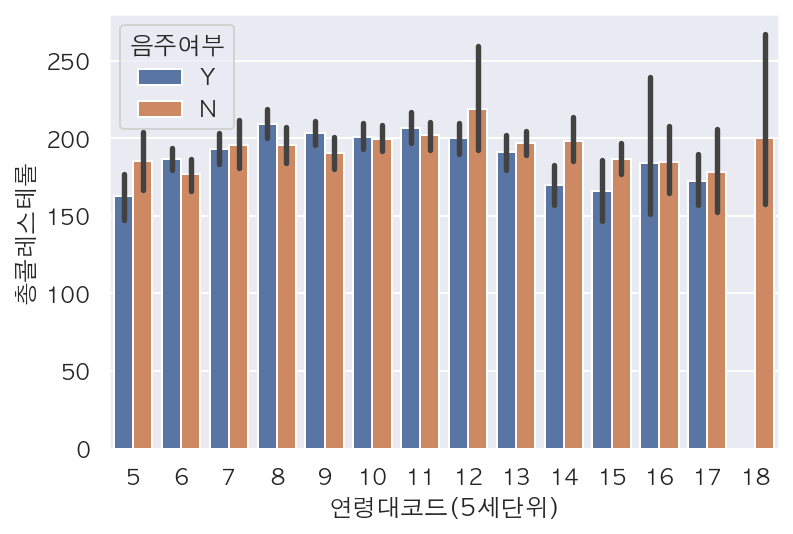

In [45]:
#hue로 색상을 다르게 표현할 수 있음. 음주여부를 함께 봅시다.
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

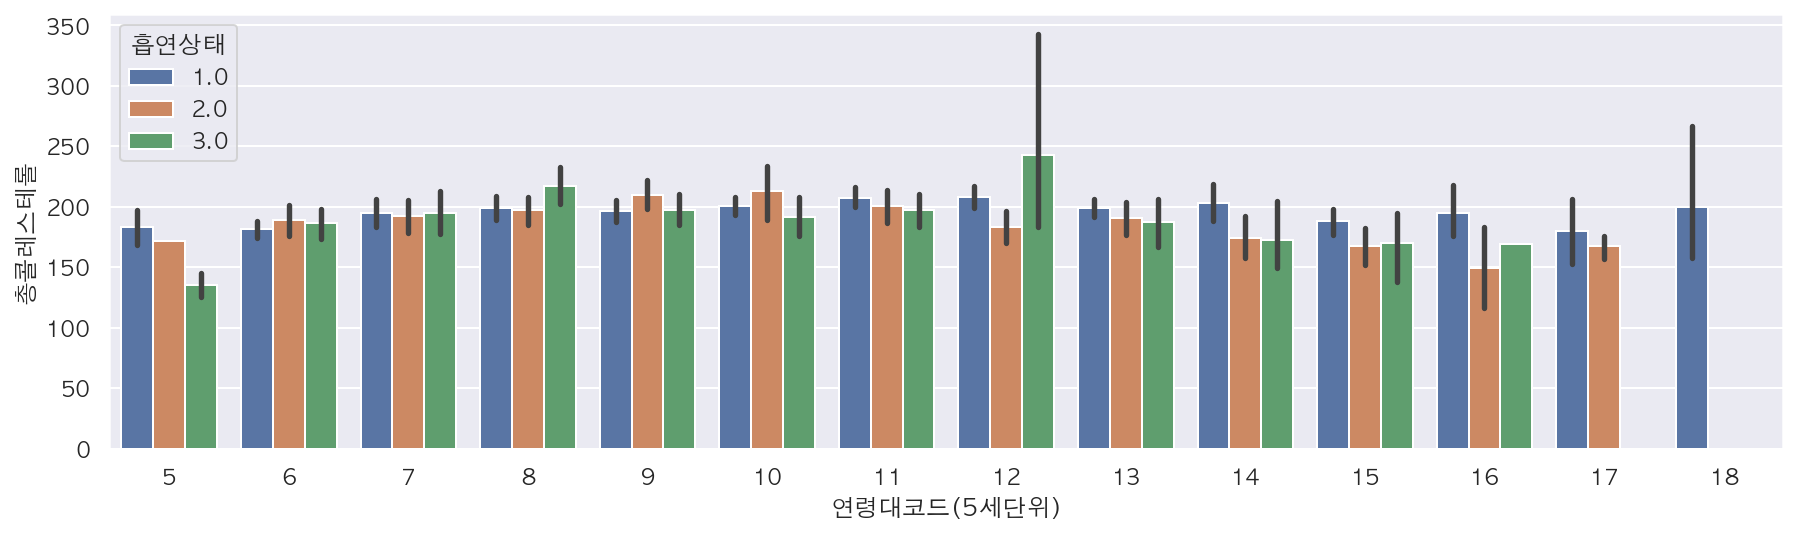

In [46]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

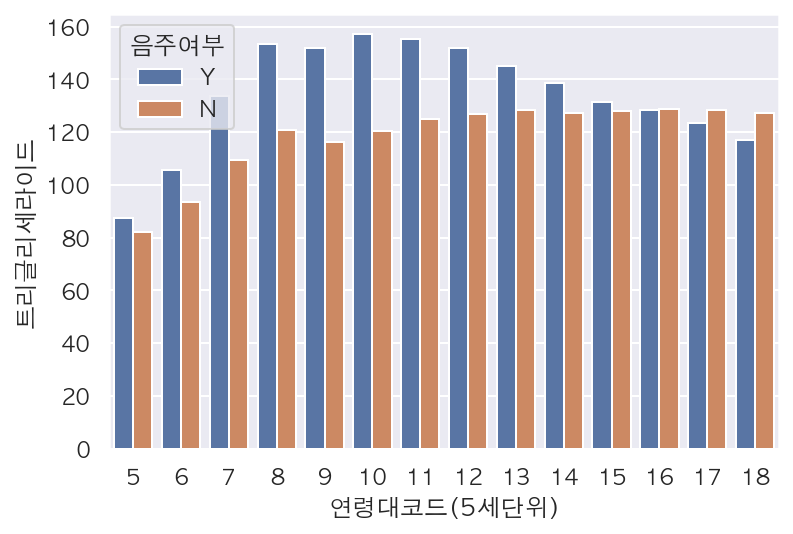

In [53]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None)
#검은색 막대 -> 신뢰도 sd, 표준편차로 확인

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

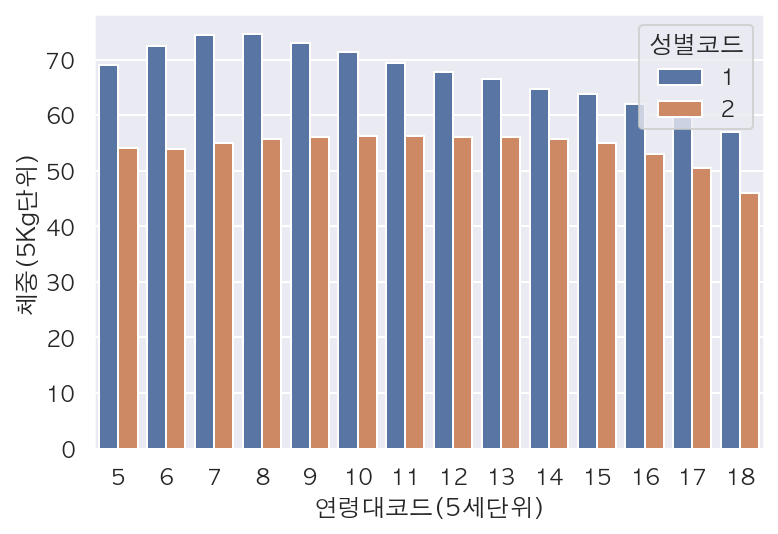

In [54]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

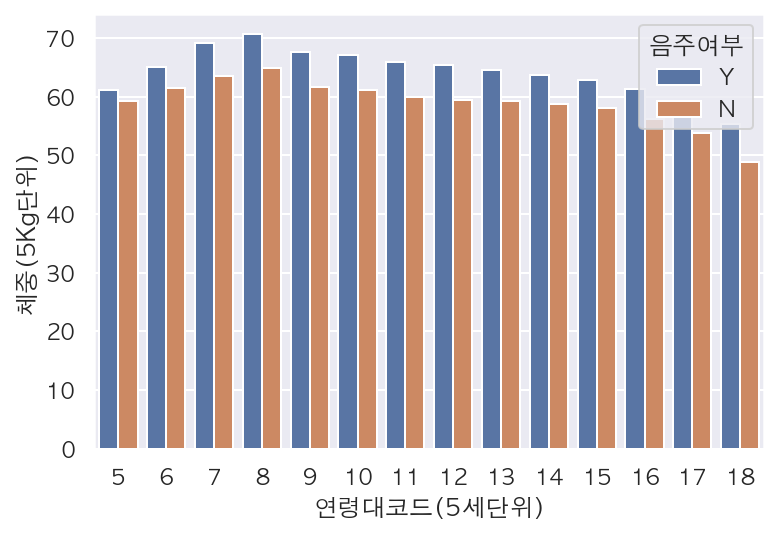

In [55]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci=None)